In [1]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import probplot

In [2]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [4]:
df = pd.read_csv('delivery_time.csv')

In [5]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
len(df.columns) # identify the number of features

2

In [7]:
df.columns #identify the features

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [8]:
df.shape # identify the size of the dataset

(21, 2)

In [9]:
df.dtypes # identify the datatypes of the features

Delivery Time    float64
Sorting Time       int64
dtype: object

In [10]:
df.isnull().values.any() #checking if dataset has empty cells

False

In [11]:
df.isnull().sum() # identify the number of empty cells

Delivery Time    0
Sorting Time     0
dtype: int64

GRAPHICAL UNIVARIANT ANALYSIS

For univariate analysis, we have Histogram, density plot, boxplot or violinplot, and Normal Q-Q plot. They help us understand the distribution of the data points and the presence of outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q plot of Delivery Time')

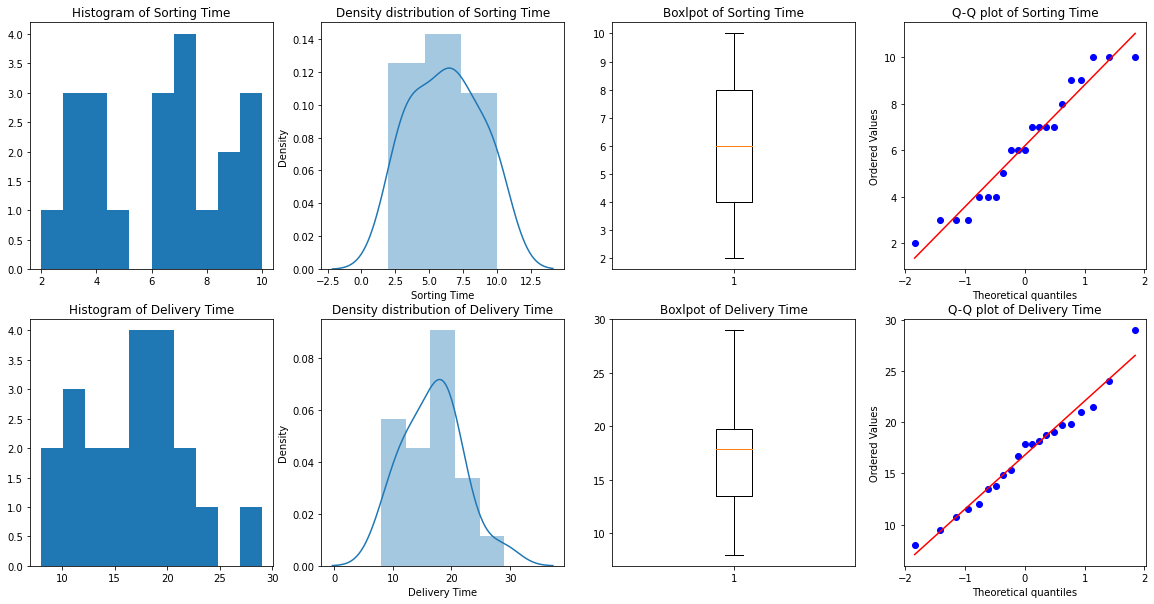

In [12]:
#Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(df['Sorting Time'],density=False)
plt.title('Histogram of Sorting Time')
plt.subplot(2,4,5)
plt.hist(df['Delivery Time'], density=False)
plt.title("Histogram of Delivery Time")

# Density plot
plt.subplot(2,4,2)
sns.distplot(df['Sorting Time'], kde=True)
plt.title("Density distribution of Sorting Time")
plt.subplot(2,4,6)
sns.distplot(df['Delivery Time'], kde=True)
plt.title("Density distribution of Delivery Time")

# boxplot or violin plot
plt.subplot(2,4,3)
plt.boxplot(df['Sorting Time'])
plt.title("Boxlpot of Sorting Time")
plt.subplot(2,4,7)
plt.boxplot(df['Delivery Time'])
plt.title("Boxlpot of Delivery Time")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(df['Sorting Time'], plot=plt)
plt.title("Q-Q plot of Sorting Time")
plt.subplot(2,4,8)
probplot(df['Delivery Time'], plot=plt)
plt.title("Q-Q plot of Delivery Time")

In [13]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [14]:
df_cleaned1 = df.rename({'Delivery Time': 'DT'}, axis=1)

In [15]:
df_cleaned1

,DT,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
df_cleaned2 = df_cleaned1.rename({'Sorting Time': 'ST'}, axis=1)

In [17]:
df_cleaned2

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Fitting a Linear Regression Model

In [18]:
model = smf.ols('DT~ST',data=df_cleaned2).fit()

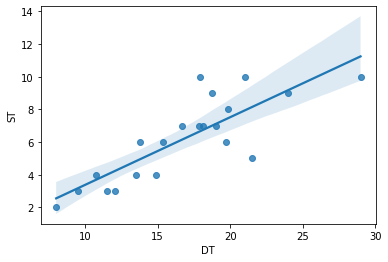

In [19]:
sns.regplot(x='DT',y='ST', data=df_cleaned2);

In [20]:
#coefficients
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [21]:
#t and p value
print(model.tvalues,'\n',model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [22]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)